In [41]:
import pandas as pd
import numpy as np

In [42]:
X_Train = pd.read_csv('Logistic_X_Train.csv')
Y_Train = pd.read_csv('Logistic_Y_Train.csv')

In [43]:
print(X_Train.shape)
X_Train.head(n=5)

(2250, 2)


,f1,f2
0,0.574727,0.787277
1,0.251502,0.908940
2,1.860578,0.013763
3,0.019477,1.047210
4,0.029794,0.252236


In [44]:
print(Y_Train.shape)
Y_Train.head(n=5)

(2250, 1)


,label
0,0
1,0
2,1
3,0
4,1


In [45]:
X_Train = X_Train.values
Y_Train = Y_Train.values
Y_Train = Y_Train.reshape(-1,)
print(Y_Train.shape)

(2250,)


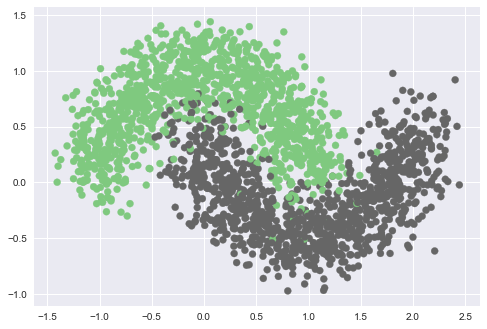

In [46]:
# Visualizing Data
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.scatter(X_Train[:,0],X_Train[:,1],c=Y_Train,cmap=plt.cm.Accent)
plt.show()

## Neural Network Code

In [51]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model = {} # dictionary
        
        # First Layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        # Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        # Third Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model 
        
        
    def forward(self,x):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
    
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        a1,a2,y_ = self.activation_outputs
        m = x.shape[0]
    
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)

        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)

        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(x.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        # Update the model parameter using Gradient Descent
        self.model['W1'] -= learning_rate*dw1
        self.model['b1'] -= learning_rate*db1

        self.model['W2'] -= learning_rate*dw2
        self.model['b2'] -= learning_rate*db2

        self.model['W3'] -= learning_rate*dw3
        self.model['b3'] -= learning_rate*db3

    
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)


    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs

        print("W1",W1.shape)
        print("A1",a1.shape)

        print("W2",W2.shape)
        print("A2",a2.shape)

        print("W3",W3.shape)
        print("Y_",y_.shape)
    


    

In [52]:
def loss(y_oht, p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht
    
def softmax(a):
    e_pa = np.exp(a)
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [53]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    
    classes = 2
    Y_OHT = one_hot(Y,classes)
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        training_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)
        
        if(logs):
            print("Epoch %d Loss %.4f"%(ix,l))
            
    return training_loss
        

In [59]:
#Training Model
model = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)
losses = train(X_Train,Y_Train,model,1000,0.001,True)

Epoch 0 Loss 0.3980
Epoch 1 Loss 0.4687
Epoch 2 Loss 0.4055
Epoch 3 Loss 0.8492
Epoch 4 Loss 0.2641
Epoch 5 Loss 0.2675
Epoch 6 Loss 0.2458
Epoch 7 Loss 0.2700
Epoch 8 Loss 0.2114
Epoch 9 Loss 0.2339
Epoch 10 Loss 0.1832
Epoch 11 Loss 0.1881
Epoch 12 Loss 0.1616
Epoch 13 Loss 0.1698
Epoch 14 Loss 0.1506
Epoch 15 Loss 0.1636
Epoch 16 Loss 0.1464
Epoch 17 Loss 0.1699
Epoch 18 Loss 0.1427
Epoch 19 Loss 0.1691
Epoch 20 Loss 0.1364
Epoch 21 Loss 0.1607
Epoch 22 Loss 0.1299
Epoch 23 Loss 0.1539
Epoch 24 Loss 0.1237
Epoch 25 Loss 0.1467
Epoch 26 Loss 0.1174
Epoch 27 Loss 0.1383
Epoch 28 Loss 0.1107
Epoch 29 Loss 0.1287
Epoch 30 Loss 0.1037
Epoch 31 Loss 0.1185
Epoch 32 Loss 0.0966
Epoch 33 Loss 0.1086
Epoch 34 Loss 0.0903
Epoch 35 Loss 0.1005
Epoch 36 Loss 0.0855
Epoch 37 Loss 0.0949
Epoch 38 Loss 0.0822
Epoch 39 Loss 0.0912
Epoch 40 Loss 0.0799
Epoch 41 Loss 0.0886
Epoch 42 Loss 0.0783
Epoch 43 Loss 0.0864
Epoch 44 Loss 0.0771
Epoch 45 Loss 0.0845
Epoch 46 Loss 0.0761
Epoch 47 Loss 0.0827
Ep

Epoch 383 Loss 0.0494
Epoch 384 Loss 0.0494
Epoch 385 Loss 0.0494
Epoch 386 Loss 0.0493
Epoch 387 Loss 0.0493
Epoch 388 Loss 0.0493
Epoch 389 Loss 0.0493
Epoch 390 Loss 0.0492
Epoch 391 Loss 0.0493
Epoch 392 Loss 0.0492
Epoch 393 Loss 0.0492
Epoch 394 Loss 0.0492
Epoch 395 Loss 0.0492
Epoch 396 Loss 0.0491
Epoch 397 Loss 0.0491
Epoch 398 Loss 0.0491
Epoch 399 Loss 0.0490
Epoch 400 Loss 0.0490
Epoch 401 Loss 0.0490
Epoch 402 Loss 0.0490
Epoch 403 Loss 0.0489
Epoch 404 Loss 0.0489
Epoch 405 Loss 0.0489
Epoch 406 Loss 0.0489
Epoch 407 Loss 0.0488
Epoch 408 Loss 0.0488
Epoch 409 Loss 0.0488
Epoch 410 Loss 0.0488
Epoch 411 Loss 0.0487
Epoch 412 Loss 0.0487
Epoch 413 Loss 0.0487
Epoch 414 Loss 0.0487
Epoch 415 Loss 0.0486
Epoch 416 Loss 0.0486
Epoch 417 Loss 0.0486
Epoch 418 Loss 0.0486
Epoch 419 Loss 0.0485
Epoch 420 Loss 0.0486
Epoch 421 Loss 0.0485
Epoch 422 Loss 0.0485
Epoch 423 Loss 0.0485
Epoch 424 Loss 0.0485
Epoch 425 Loss 0.0484
Epoch 426 Loss 0.0485
Epoch 427 Loss 0.0484
Epoch 428 

Epoch 766 Loss 0.0446
Epoch 767 Loss 0.0446
Epoch 768 Loss 0.0446
Epoch 769 Loss 0.0446
Epoch 770 Loss 0.0446
Epoch 771 Loss 0.0446
Epoch 772 Loss 0.0446
Epoch 773 Loss 0.0445
Epoch 774 Loss 0.0446
Epoch 775 Loss 0.0445
Epoch 776 Loss 0.0446
Epoch 777 Loss 0.0445
Epoch 778 Loss 0.0446
Epoch 779 Loss 0.0445
Epoch 780 Loss 0.0445
Epoch 781 Loss 0.0445
Epoch 782 Loss 0.0445
Epoch 783 Loss 0.0445
Epoch 784 Loss 0.0445
Epoch 785 Loss 0.0445
Epoch 786 Loss 0.0445
Epoch 787 Loss 0.0445
Epoch 788 Loss 0.0445
Epoch 789 Loss 0.0445
Epoch 790 Loss 0.0445
Epoch 791 Loss 0.0445
Epoch 792 Loss 0.0445
Epoch 793 Loss 0.0444
Epoch 794 Loss 0.0445
Epoch 795 Loss 0.0444
Epoch 796 Loss 0.0445
Epoch 797 Loss 0.0444
Epoch 798 Loss 0.0444
Epoch 799 Loss 0.0444
Epoch 800 Loss 0.0444
Epoch 801 Loss 0.0444
Epoch 802 Loss 0.0444
Epoch 803 Loss 0.0444
Epoch 804 Loss 0.0444
Epoch 805 Loss 0.0444
Epoch 806 Loss 0.0444
Epoch 807 Loss 0.0444
Epoch 808 Loss 0.0444
Epoch 809 Loss 0.0444
Epoch 810 Loss 0.0444
Epoch 811 

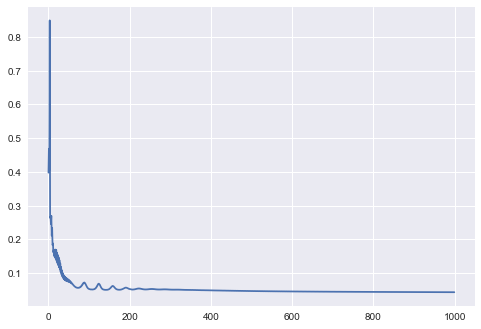

In [60]:
plt.plot(losses)
plt.show()

In [61]:
model.summary()

W1 (2, 10)
A1 (2250, 10)
W2 (10, 5)
A2 (2250, 5)
W3 (5, 2)
Y_ (2250, 2)


In [63]:
from visualize import plot_decision_boundary

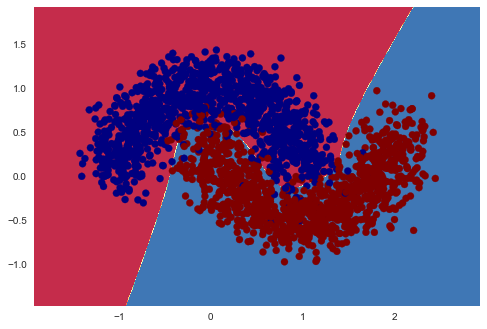

In [64]:
plot_decision_boundary(lambda x:model.predict(x),X_Train,Y_Train)

In [65]:
outputs = model.predict(X_Train)
np.sum(outputs==Y_Train)/Y_Train.shape[0]

0.9671111111111111

In [67]:
X_Test = pd.read_csv('Logistic_X_Test.csv')

In [68]:
X_Test = X_Test.values

In [69]:
pred = model.predict(X_Test)

In [70]:
print(pred)

[0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1
 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1
 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0
 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1
 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0
 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1
 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1
 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1
 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1
 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1
 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1
 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 1 0 1 1 1 0 1 1 0 1 

In [75]:
# Saving File
df = pd.DataFrame(data=pred,columns=["label"])
df.to_csv("Logistic_Y_Pred.csv",index=False)